**# Анализ данных Riiid Test Answer Prediction**

Этот проект нацелен на всесторонний анализ данных для предсказания того, правильно ли ученик ответит на вопрос. Мы используем три ключевых датасета:
- `train.csv`: Содержит данные о взаимодействиях пользователей с вопросами и лекциями.
- `lectures.csv`: Метаданные по лекциям.
- `questions.csv`: Метаданные по вопросам.

**### Этап 1: Импорт данных и их предварительный обзор**
Мы загрузили данные и выполнили предварительное изучение структуры датасетов.


# **1. Импорт библиотек и загрузка данных**

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
from IPython.display import display

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
!pip install gdown
!pip install dask

In [ ]:
# Настройка стиля графиков
sns.set(style="whitegrid")

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1k0k3d-WO9kYqp0q9QG1WcmLn6mWWs0Zd

Retrieving folder contents
Processing file 10ArXJ6QnquvNQzXpbxeEuQY2Af8LXddP lectures.csv
Processing file 1x4ybKLXnKUdW-EINwnVG_kJmLzfOTWE1 questions.csv
Processing file 1Z7PIRZ1PXdpb6O3uy4vmW6rdqECkrUu6 train.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=10ArXJ6QnquvNQzXpbxeEuQY2Af8LXddP
To: /content/Python data/lectures.csv
100% 9.70k/9.70k [00:00<00:00, 19.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1x4ybKLXnKUdW-EINwnVG_kJmLzfOTWE1
To: /content/Python data/questions.csv
100% 296k/296k [00:00<00:00, 70.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Z7PIRZ1PXdpb6O3uy4vmW6rdqECkrUu6
From (redirected): https://drive.google.com/uc?id=1Z7PIRZ1PXdpb6O3uy4vmW6rdqECkrUu6&confirm=t&uuid=8b807a95-e2c5-4787-b804-6ef3f300be35
To: /content/Python data/train.csv
100% 5.85G/5.85G [01:40<00:00, 58.3MB/s]
Download completed


In [ ]:
import os
os.listdir('./')

['.config', 'Python data', 'sample_data']

In [ ]:
# Загрузка данных при помощи пандас
lectures = pd.read_csv('/content/Python data/lectures.csv')
questions = pd.read_csv('/content/Python data/questions.csv')
# Загрузка даннхы при помощи Dask для train.csv, т.к. размер файла большой, и сеанс гугл колаб на бесплатном тарифе перезагружается
train = dd.read_csv('/content/Python data/train.csv')

In [ ]:
# Отображение первых строк каждого датасета для понимания их структуры
display(lectures.head())
display(questions.head())
display(train.head())

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


### **Шаг 2: Анализ данных лекций**


#**2. Анализ данных из lectures.csv**
## **Общая информация и распределение данных**

In [ ]:
# Вывод информации о DataFrame
print(lectures.info())
# Проверка наличия пропущенных значений
display(lectures.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB
None


,0
lecture_id,0
tag,0
part,0
type_of,0


<ipython-input-28-47c3ee27b207>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='part', data=lectures, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-l

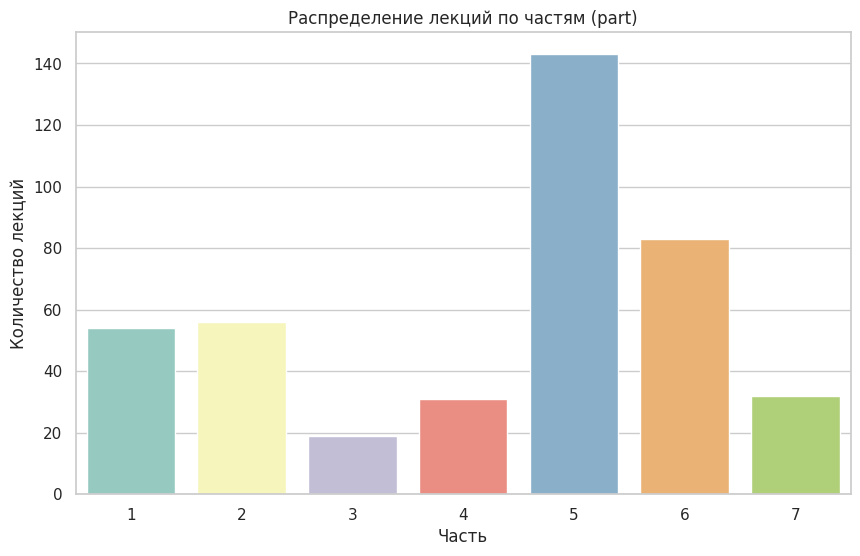

<ipython-input-28-47c3ee27b207>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type_of', data=lectures, palette='cool')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 li

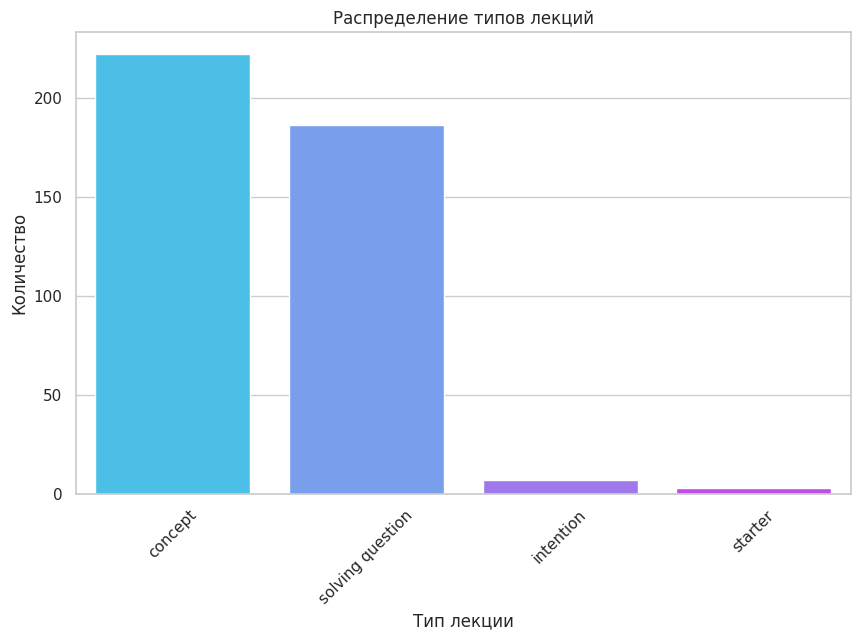

In [ ]:
# Визуализация распределения лекций по частям (part)
plt.figure(figsize=(10, 6))
sns.countplot(x='part', data=lectures, palette='Set3')
plt.title('Распределение лекций по частям (part)')
plt.xlabel('Часть')
plt.ylabel('Количество лекций')
plt.show()

# Визуализация типов лекций
plt.figure(figsize=(10, 6))
sns.countplot(x='type_of', data=lectures, palette='cool')
plt.title('Распределение типов лекций')
plt.xlabel('Тип лекции')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# **Анализ данных из questions.csv**

In [ ]:
# Общая информация о датасете вопросов
display(questions.info())

# Проверка наличия пропущенных значений
display(questions.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


None

,0
question_id,0
bundle_id,0
correct_answer,0
part,0
tags,1


<ipython-input-8-b97dc88846b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='part', data=questions, palette='muted')


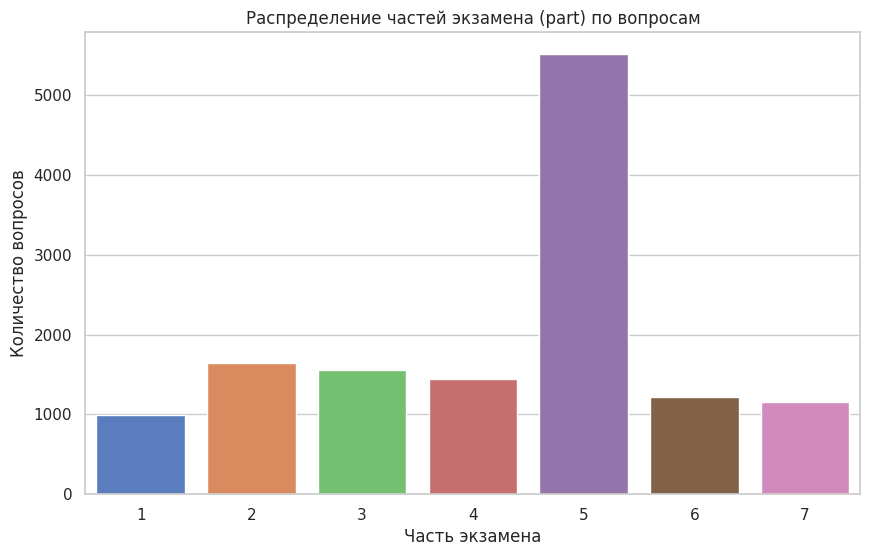

<ipython-input-8-b97dc88846b8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tag_count', data=questions, palette='husl')


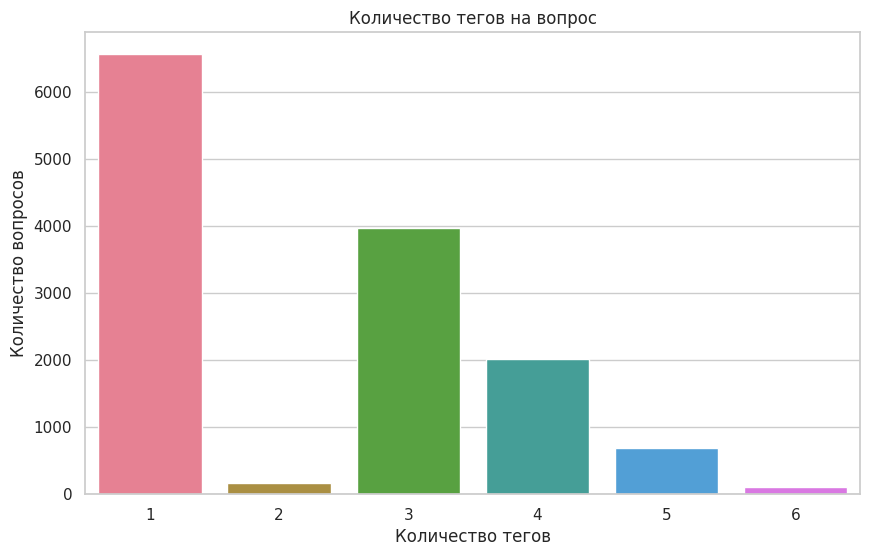

In [ ]:
# Визуализация распределения частей экзамена (part) в вопросах
plt.figure(figsize=(10, 6))
sns.countplot(x='part', data=questions, palette='muted')
plt.title('Распределение частей экзамена (part) по вопросам')
plt.xlabel('Часть экзамена')
plt.ylabel('Количество вопросов')
plt.show()

# Анализ тегов вопросов (tags)
questions['tag_count'] = questions['tags'].apply(lambda x: len(str(x).split(' ')))
plt.figure(figsize=(10, 6))
sns.countplot(x='tag_count', data=questions, palette='husl')
plt.title('Количество тегов на вопрос')
plt.xlabel('Количество тегов')
plt.ylabel('Количество вопросов')
plt.show()

#**Шаг 3: Анализ данных из train.csv**

In [ ]:
# Общая информация о датасете train
display(train.info())

# Проверка наличия пропущенных значений
display(train.isnull().sum().compute())

# Описание статистических данных
display(train.describe().compute())

<class 'dask.dataframe.core.DataFrame'>
Columns: 10 entries, row_id to prior_question_had_explanation
dtypes: float64(1), int64(8), string(1)

None

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,0
row_id,0
timestamp,0
user_id,0
content_id,0
content_type_id,0
task_container_id,0
user_answer,0
answered_correctly,0
prior_question_elapsed_time,2351538
prior_question_had_explanation,392506


/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.520576e+07,6.832262e+08,5.387874e+08,2.275000e+03,0.000000e+00,1.290000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061362e+07,3.537407e+09,1.071759e+09,5.207000e+03,0.000000e+00,4.790000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.566323e+07,1.303172e+10,1.610528e+09,7.712000e+03,0.000000e+00,1.449000e+03,3.000000e+00,1.000000e+00,3.000000e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
<ipython-input-10-dd61e64b60e8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='answered_correctly', data=train_sample, palette='Set2')


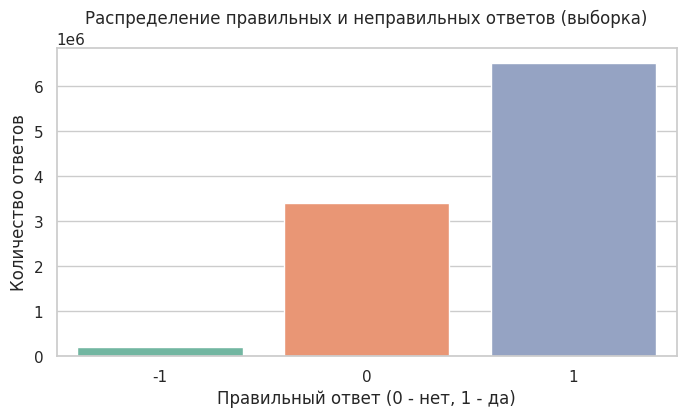

In [ ]:
# 1. Визуализация распределения целевой переменной (правильность ответа)
# Получаем случайную выборку 10% строк из датасета, т.к. датасет большой, и из-за переполнения ОЗУ гугл колаб перезагружается
train_sample = train.sample(frac=0.1, random_state=42).compute()

# Визуализация распределения целевой переменной (правильность ответа)
plt.figure(figsize=(8, 4))
sns.countplot(x='answered_correctly', data=train_sample, palette='Set2')
plt.title('Распределение правильных и неправильных ответов (выборка)')
plt.xlabel('Правильный ответ (0 - нет, 1 - да)')
plt.ylabel('Количество ответов')
plt.show()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,count
user_id,
801103753,17917
1478712595,16914
1842816145,16851
455973631,16789
1660941992,16777
1743444187,16654
2146130037,16384
1047202059,16348
1615528747,16146


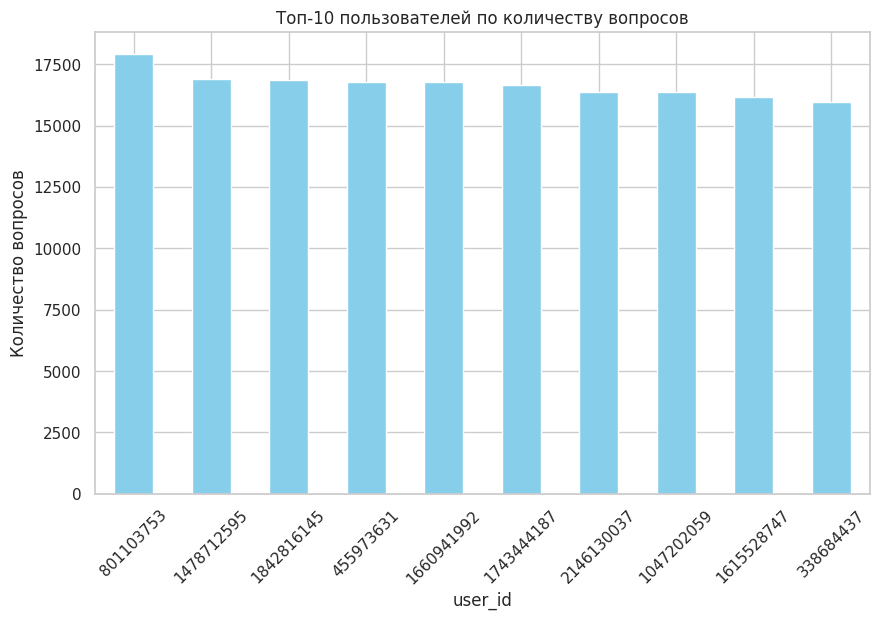

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


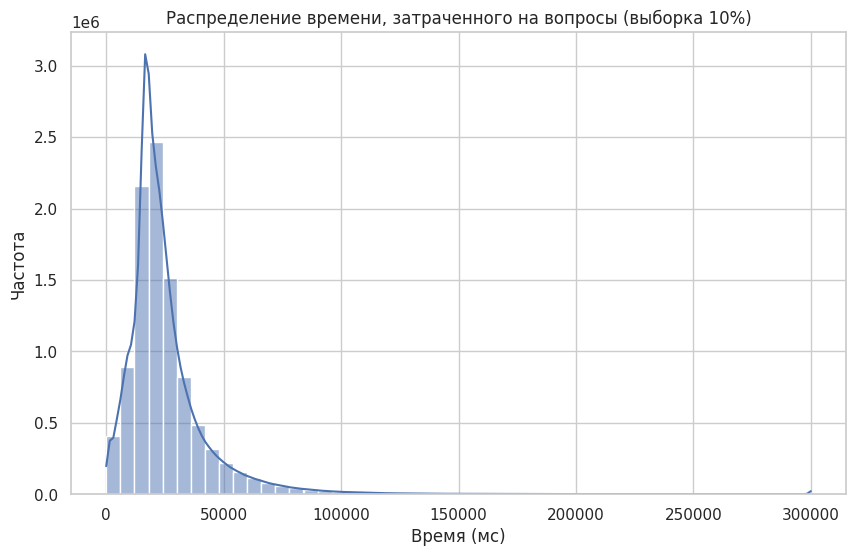

In [ ]:
# Анализ: количество вопросов по пользователям
# Получаем случайную выборку 10% пользователей для анализа
user_question_counts = train['user_id'].value_counts().compute()
top_users = user_question_counts.head(10)

display(top_users)

# Визуализация: Топ-10 пользователей по количеству вопросов
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='skyblue')
plt.title('Топ-10 пользователей по количеству вопросов')
plt.xlabel('user_id')
plt.ylabel('Количество вопросов')
plt.xticks(rotation=45)
plt.show()

# Анализ: Время, затраченное на вопросы
# Получаем случайную выборку 10% данных для анализа времени
elapsed_time_sample = train['prior_question_elapsed_time'].dropna().sample(frac=0.1, random_state=42).compute()

plt.figure(figsize=(10, 6))
sns.histplot(elapsed_time_sample, bins=50, kde=True)
plt.title('Распределение времени, затраченного на вопросы (выборка 10%)')
plt.xlabel('Время (мс)')
plt.ylabel('Частота')
plt.show()

In [ ]:
# 1. Общая информация о датасетах в одном блоке.

# Информация о lectures
display(lectures.info())
display(pd.DataFrame({
    'Количество уникальных lecture_id': [lectures['lecture_id'].nunique()],
    'Количество записей в lectures': [lectures.shape[0]]
}))

# Информация о questions
display(questions.info())
display(pd.DataFrame({
    'Количество уникальных question_id': [questions['question_id'].nunique()],
    'Количество записей в questions': [questions.shape[0]]
}))

# Информация о train
display(train.info())
display(pd.DataFrame({
    'Количество уникальных user_id': [train['user_id'].nunique().compute()],
    'Количество записей в train': [train.shape[0].compute()]
}))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


None

,Количество уникальных lecture_id,Количество записей в lectures
0,418,418


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
 5   tag_count       13523 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 634.0+ KB


None

,Количество уникальных question_id,Количество записей в questions
0,13523,13523


<class 'dask.dataframe.core.DataFrame'>
Columns: 10 entries, row_id to prior_question_had_explanation
dtypes: float64(1), int64(8), string(1)

None

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,Количество уникальных user_id,Количество записей в train
0,393656,101230332


In [ ]:
# 33 Статистические показатели
# Для lectures
lectures_stats = lectures.describe()
lectures_stats['Тип'] = 'Lectures'  # Добавляем новый столбец с типом
display(lectures_stats)

# Для questions
questions_stats = questions.describe()
questions_stats['Тип'] = 'Questions'  # Добавляем новый столбец с типом
display(questions_stats)

# Для train
train_stats = train.describe().compute()
train_stats['Тип'] = 'Train'  # Добавляем новый столбец с типом
display(train_stats)

,lecture_id,tag,part,Тип
count,418.000000,418.000000,418.000000,Lectures
mean,16983.401914,94.480861,4.267943,Lectures
std,9426.164660,53.586487,1.872424,Lectures
min,89.000000,0.000000,1.000000,Lectures
25%,9026.250000,50.250000,2.000000,Lectures
50%,17161.500000,94.500000,5.000000,Lectures
75%,24906.250000,140.000000,6.000000,Lectures
max,32736.000000,187.000000,7.000000,Lectures


,question_id,bundle_id,correct_answer,part,tag_count,Тип
count,13523.00000,13523.000000,13523.000000,13523.000000,13523.000000,Questions
mean,6761.00000,6760.510907,1.455298,4.264956,2.291873,Questions
std,3903.89818,3903.857783,1.149707,1.652553,1.369772,Questions
min,0.00000,0.000000,0.000000,1.000000,1.000000,Questions
25%,3380.50000,3379.500000,0.000000,3.000000,1.000000,Questions
50%,6761.00000,6761.000000,1.000000,5.000000,3.000000,Questions
75%,10141.50000,10140.000000,3.000000,5.000000,3.000000,Questions
max,13522.00000,13522.000000,3.000000,7.000000,6.000000,Questions


/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,Тип
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07,Train
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04,Train
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04,Train
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,Train
25%,2.520576e+07,6.832262e+08,5.387874e+08,2.275000e+03,0.000000e+00,1.290000e+02,0.000000e+00,0.000000e+00,1.600000e+04,Train
50%,5.061362e+07,3.537407e+09,1.071759e+09,5.207000e+03,0.000000e+00,4.790000e+02,1.000000e+00,1.000000e+00,2.100000e+04,Train
75%,7.566323e+07,1.303172e+10,1.610528e+09,7.712000e+03,0.000000e+00,1.449000e+03,3.000000e+00,1.000000e+00,3.000000e+04,Train
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05,Train


#**Заключение**

На основе проанализованных данных о трех наборах данных (lectures, questions и train) можно сделать следующие выводы:

## Общая информация о датасетах

### 1. Lectures:
- **Количество записей**: 418.
- **Количество уникальных `lecture_id`**: 418.
- **Столбцы**:
  - `lecture_id`: уникальный идентификатор лекции (тип int64).
  - `tag`: тег, связанный с лекцией (тип int64).
  - `part`: часть курса, к которой относится лекция (тип int64).
  - `type_of`: тип лекции (тип object).
- Данные полностью заполнены (нет пропущенных значений).

### 2. Questions:
- **Количество записей**: 13,523.
- **Количество уникальных `question_id`**: 13,523.
- **Столбцы**:
  - `question_id`: уникальный идентификатор вопроса (тип int64).
  - `bundle_id`: идентификатор набора вопросов (тип int64).
  - `correct_answer`: правильный ответ (тип int64).
  - `part`: часть курса, к которой относится вопрос (тип int64).
  - `tags`: теги, связанные с вопросом (тип object, 1 пропущенное значение).
  - `tag_count`: количество тегов, связанных с вопросом (тип int64).
- Большинство данных заполнены, за исключением одного пропущенного значения в столбце `tags`.

### 3. Train:
- **Количество записей**: 101,230,332.
- **Количество уникальных `user_id`**: 393,656.
- **Столбцы**:
  - `row_id`: уникальный идентификатор записи (тип int64).
  - `timestamp`: время ответа (тип float64).
  - `user_id`: идентификатор пользователя (тип int64).
  - `content_id`: идентификатор контента (тип int64).
  - `content_type_id`: тип контента (тип int64).
  - `task_container_id`: идентификатор контейнера задач (тип int64).
  - `user_answer`: ответ пользователя (тип int64).
  - `answered_correctly`: признак правильности ответа (тип int64).
  - `prior_question_elapsed_time`: время, прошедшее до текущего вопроса (тип float64, 1 пропущенное значение).
- Данные о пользователях содержат большое количество записей, что позволяет провести детальный анализ их взаимодействия с контентом.

## Пропущенные значения
В анализируемых датасетах наблюдаются пропущенные значения в столбцах `tags` (вопросы) и `prior_question_elapsed_time` (train), что следует учитывать при дальнейшей обработке данных. Необходимо решить, как с ними обращаться (удаление, заполнение и т.д.).

## Статистические показатели
- Для **lectures** наблюдается, что значение `tag` варьируется от 0 до 187, в то время как `part` имеет значения от 1 до 7. Это указывает на разнообразие тегов и частей, что может быть полезным для дальнейшего анализа.
- Для **questions**:
  - `correct_answer` варьируется от 0 до 3, что говорит о наличии различных типов вопросов.
  - `tag_count` показывает, что вопросы имеют в среднем около 2 тегов, что подтверждает их разнообразие.
- В **train** данные обрабатываются в огромном объеме, что предполагает наличие значительного количества взаимодействий пользователей с контентом.

## Заключение
Анализ данных, представленных в этих трех наборах, предоставляет хорошую основу для дальнейшего изучения и разработки. Обширные объемы данных, разнообразные типы контента и детали взаимодействий с ним позволяют выявить паттерны, которые могут быть использованы для адаптации образовательного процесса.
